# Notebook Summary

This notebook explores the Titanic dataset and aims to predict the survival of passengers based on various features such as age, gender, and ticket class. It includes:
- [import necessary packages](#import)
- [Data loading and Visualisations](#data_loading)
- [Data Preprocessing](#data_preprocessing)
- [Model Training & Evaluation](#training)


# <a id="import"></a>import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os
import sys
import argparse
import re
import tqdm
import pickle

# <a id="data_loading"></a>Data loading and Visualisations

- load the dataset

In [2]:
df = pd.read_csv('data/Titanic-Dataset.csv')

- some data visualisations

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking numeber of rows
print(df.shape)

(891, 12)


In [5]:
# check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\Amir\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Amir\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Amir\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function seaborn.categorical.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, ax=None, **kwargs)>

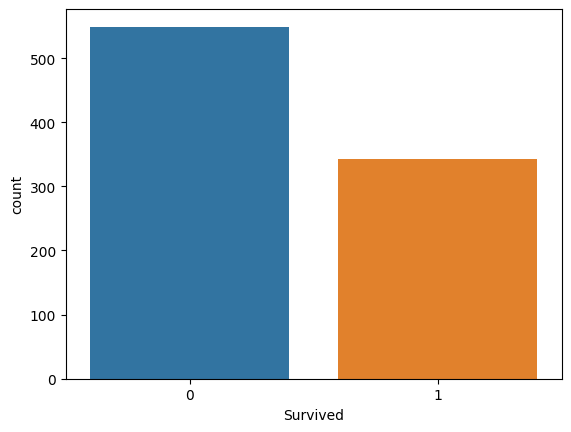

In [6]:
# visualise data with plots
sns.countplot(x='Survived', data=df)

sns.countplot

<Axes: xlabel='Embarked'>

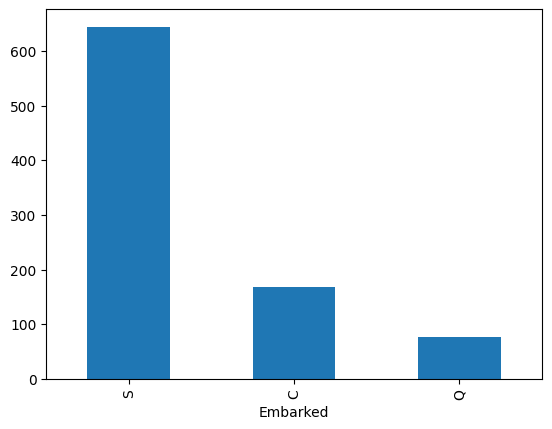

In [7]:
df["Embarked"].value_counts().plot(kind='bar')

# <a id="data_preprocessing"></a>Data Preprocessing

- ### scaling <b> "fare" </b> Column 

In [8]:
#scaling fare column
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1))

- ###  feature selection

In [9]:
# Drop the columns that are not useful
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [10]:
# checking missing values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

- ###  Encoding Categorical Columns 
In order to use `XGBOOST`, we need to encode the categorical columns. This can be done using `one-hot encoding` or label encoding.


In [11]:
# Convert categorical columns into numerical values using dummies encoding
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'])

- ### Imputing Missing Values

Missing values are a common issue in datasets and can affect the performance of machine learning models. In this task, we use the `IterativeImputer` class from the `sklearn.

The `IterativeImputer` class uses a machine learning model to estimate missing values based on the other features in the dataset. It iteratively imputes missing values by modeling each feature with missing values as a function of other features.



In [12]:
#imputing missing values with iterative imputer
imputer = IterativeImputer()
df_imputed = imputer.fit_transform(df_encoded)
df_imputed = pd.DataFrame(df_imputed, columns=df_encoded.columns)




# <a id="training"></a>Model Training & Evaluation

- ### Spliting the dataframe into train and test sets

In [13]:
X = df_imputed.drop('Survived', axis=1)
y = df_imputed['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# checking the shape of the train and test data
print(X_train.shape, X_test.shape)

(712, 10) (179, 10)


- ### Setting up the models

In [15]:



Models = [
    Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]),
    Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier())
    ]),
    Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', keras.models.Sequential([
            layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
            layers.Dense(32, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ]))
    ])
]
Models_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network']

- ### Train,Test & Evaluate the models

In [16]:
for index, model in enumerate(Models):
    if model is not None:
        print(f"Training the: {Models_names[index]} model...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f" • Train accuracy: {accuracy_score(y_test, y_pred)}")
        print(f" • Train f1_score: {f1_score(y_test, y_pred, average='macro')}")

print('Done!')

Training the: Logistic Regression model...
 • Train accuracy: 0.8212290502793296
 • Train f1_score: 0.8091684434968016
Training the: Decision Tree model...
 • Train accuracy: 0.7653631284916201
 • Train f1_score: 0.74798873692679
Training the: Random Forest model...
 • Train accuracy: 0.8547486033519553
 • Train f1_score: 0.8429824561403509
Training the: XGBoost model...
 • Train accuracy: 0.8715083798882681
 • Train f1_score: 0.8632453080883573
Done!


## Conclusion
By using the `XGBOOST classifier`, we were able to achieve the highest accuracy score on the test set, indicating that it performed the best in predicting the survival of passengers in the Titanic dataset.

<b style="Color:red">Note: </b> Even though XGBoost can handle the `missing values` without manual imputing but we found a better accuracy when we had impute them 